In [ ]:
import pandas as pd

In [ ]:
df_hour = pd.read_csv("hour.csv")

In [ ]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
workd = df_hour[df_hour.workingday==1]
holid = df_hour[df_hour.workingday==0]

In [ ]:
workd['rainy'] = (workd['weathersit']>2)*1
holid['rainy'] = (holid['weathersit']>2)*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
workd8 = workd[(workd['hr']==8)]
workd178 = workd[(workd['hr']==17) | (workd['hr']==18)]

In [ ]:
tmp = workd178[['hr','rainy','dteday','registered', 'season',	'mnth','temp', 'atemp', 'hum', 'windspeed']].groupby(by=['dteday']).sum()
print("Data of registered users on workingdays at 17-18:")
print("#rows", tmp.shape[0])
print("# with only 0 rain", tmp[tmp['rainy']==0].shape[0])
print("# with only 1 rain", tmp[tmp['rainy']==1].shape[0])
print("# with only 2 rain", tmp[tmp['rainy']==2].shape[0])
print("# with only 0 or 2 rain", tmp[tmp['rainy']!=1].shape[0])

print()
print("Data of registered users on workingdays at 8:")
print("#rows", workd8.shape[0])
print("# with 0 rain", workd8[workd8['rainy']==0].shape[0])
print("# with 1 rain", workd8[workd8['rainy']==1].shape[0])

Data of registered users on workingdays at 17-18:
#rows 499
# with only 0 rain 430
# with only 1 rain 34
# with only 2 rain 35
# with only 0 or 2 rain 465

Data of registered users on workingdays at 8:
#rows 496
# with 0 rain 451
# with 1 rain 45


In [ ]:
workd178_2 = workd178[['hr','rainy','dteday','registered','casual','season',	'mnth','temp', 'atemp', 'hum', 'windspeed']].groupby(by=['dteday']).mean().reset_index()
workd178_2 = workd178_2[(workd178_2['rainy']==0) | (workd178_2['rainy']==1)]
# workd178_2

workd8_2 = workd8[['hr','rainy','dteday','registered', 'casual','season',	'mnth','temp', 'atemp', 'hum', 'windspeed']]

In [ ]:
q1df = workd8_2.append(workd178_2)
q1df

,hr,rainy,dteday,registered,casual,season,mnth,temp,atemp,hum,windspeed
53,8.0,0.0,2011-01-03,153.0,1.0,1.0,1.0,0.14,0.12120,0.50,0.28360
76,8.0,0.0,2011-01-04,177.0,2.0,1.0,1.0,0.14,0.15150,0.69,0.16420
99,8.0,0.0,2011-01-05,192.0,3.0,1.0,1.0,0.20,0.18180,0.40,0.29850
122,8.0,0.0,2011-01-06,216.0,3.0,1.0,1.0,0.16,0.22730,0.59,0.00000
145,8.0,0.0,2011-01-07,190.0,20.0,1.0,1.0,0.20,0.19700,0.51,0.25370
...,...,...,...,...,...,...,...,...,...,...,...
494,17.5,1.0,2012-12-24,19.5,6.5,1.0,12.0,0.24,0.25000,0.93,0.13435
495,17.5,1.0,2012-12-26,46.5,1.5,1.0,12.0,0.27,0.24245,0.93,0.32835
496,17.5,0.0,2012-12-27,207.5,19.5,1.0,12.0,0.25,0.23485,0.56,0.26865
497,17.5,0.0,2012-12-28,212.5,29.5,1.0,12.0,0.24,0.24240,0.60,0.13430


CALCULATE PROPENSITY 

In [ ]:
import statsmodels.api as sma
import statsmodels.formula.api as smf

def estimate_propensity(formula,data,show_summary=True):
  model = smf.glm(formula=formula,data=data, family=sma.families.Binomial()).fit()

  if show_summary:
    print(model.summary())
  return pd.Series(data=model.predict(data),index=data.index)

In [ ]:
propensity_model_covariates = ['mnth','season']
propensity_model_formula = 'rainy ~ '+" + ".join(propensity_model_covariates)
q1df['propensity'] = estimate_propensity(formula = propensity_model_formula, data =q1df)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  rainy   No. Observations:                  962
Model:                            GLM   Df Residuals:                      959
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.90
Date:                Thu, 15 Sep 2022   Deviance:                       553.80
Time:                        17:47:13   Pearson chi2:                     963.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1773      0.281     -7.753      0.0

In [ ]:
q1df

,hr,rainy,dteday,registered,casual,season,mnth,temp,atemp,hum,windspeed,propensity
53,8.0,0.0,2011-01-03,153.0,1.0,1.0,1.0,0.14,0.12120,0.50,0.28360,0.085746
76,8.0,0.0,2011-01-04,177.0,2.0,1.0,1.0,0.14,0.15150,0.69,0.16420,0.085746
99,8.0,0.0,2011-01-05,192.0,3.0,1.0,1.0,0.20,0.18180,0.40,0.29850,0.085746
122,8.0,0.0,2011-01-06,216.0,3.0,1.0,1.0,0.16,0.22730,0.59,0.00000,0.085746
145,8.0,0.0,2011-01-07,190.0,20.0,1.0,1.0,0.20,0.19700,0.51,0.25370,0.085746
...,...,...,...,...,...,...,...,...,...,...,...,...
494,17.5,1.0,2012-12-24,19.5,6.5,1.0,12.0,0.24,0.25000,0.93,0.13435,0.159420
495,17.5,1.0,2012-12-26,46.5,1.5,1.0,12.0,0.27,0.24245,0.93,0.32835,0.159420
496,17.5,0.0,2012-12-27,207.5,19.5,1.0,12.0,0.25,0.23485,0.56,0.26865,0.159420
497,17.5,0.0,2012-12-28,212.5,29.5,1.0,12.0,0.24,0.24240,0.60,0.13430,0.159420


In [ ]:
q1df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


hr             12.601351
rainy           0.084200
registered    457.583680
casual         37.925156
season          2.508316
mnth            6.505198
temp            0.507973
atemp           0.484660
hum             0.611861
windspeed       0.201093
propensity      0.084200
dtype: float64

In [ ]:
q1df.groupby(by='rainy').mean()

,hr,registered,casual,season,mnth,temp,atemp,hum,windspeed,propensity
rainy,,,,,,,,,,
0.0,12.636776,476.536890,39.941544,2.517594,6.507378,0.512531,0.489046,0.591169,0.200548,0.083986
1.0,12.216049,251.438272,15.993827,2.407407,6.481481,0.458395,0.436965,0.836914,0.207023,0.086518


common support

Text(0.5, 0, 'Propensity')

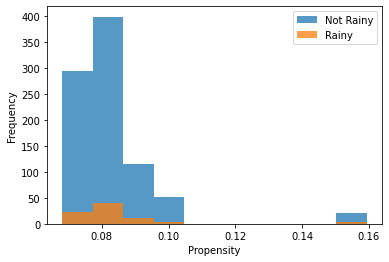

In [ ]:
from matplotlib.pyplot import *
q1df.groupby('rainy')['propensity'].plot(kind='hist',sharex=True,bins=10, alpha=0.75,legend=True)
legend(['Not Rainy', 'Rainy'])
xlabel('Propensity')

In [ ]:
import numpy as np
def trim_common_support(data, label_name):
  group_min_max = pd.DataFrame()
  group_min_max['min_propensity'] = data.groupby('rainy').propensity.min()
  group_min_max['max_propensity'] = data.groupby('rainy').propensity.max()

  # group_min_max = (data.groupby(label_name).propensity.agg({'min_propensity':np.min, 'max_propensity':np.max}))
  # print(group_min_max)###

  min_common_support = np.max(group_min_max.min_propensity)
  max_common_support = np.min(group_min_max.max_propensity)

  common_support = (data.propensity >= min_common_support) & (data.propensity <= max_common_support)
  control = (data[label_name] == 0)
  treated = (data[label_name] == 1)

  return data[common_support]


In [ ]:
final_q1df = trim_common_support(q1df, "rainy")

In [ ]:
final_q1df

,hr,rainy,dteday,registered,casual,season,mnth,temp,atemp,hum,windspeed,propensity
53,8.0,0.0,2011-01-03,153.0,1.0,1.0,1.0,0.14,0.12120,0.50,0.28360,0.085746
76,8.0,0.0,2011-01-04,177.0,2.0,1.0,1.0,0.14,0.15150,0.69,0.16420,0.085746
99,8.0,0.0,2011-01-05,192.0,3.0,1.0,1.0,0.20,0.18180,0.40,0.29850,0.085746
122,8.0,0.0,2011-01-06,216.0,3.0,1.0,1.0,0.16,0.22730,0.59,0.00000,0.085746
145,8.0,0.0,2011-01-07,190.0,20.0,1.0,1.0,0.20,0.19700,0.51,0.25370,0.085746
...,...,...,...,...,...,...,...,...,...,...,...,...
494,17.5,1.0,2012-12-24,19.5,6.5,1.0,12.0,0.24,0.25000,0.93,0.13435,0.159420
495,17.5,1.0,2012-12-26,46.5,1.5,1.0,12.0,0.27,0.24245,0.93,0.32835,0.159420
496,17.5,0.0,2012-12-27,207.5,19.5,1.0,12.0,0.25,0.23485,0.56,0.26865,0.159420
497,17.5,0.0,2012-12-28,212.5,29.5,1.0,12.0,0.24,0.24240,0.60,0.13430,0.159420


Text(0.5, 0, 'Propensity')

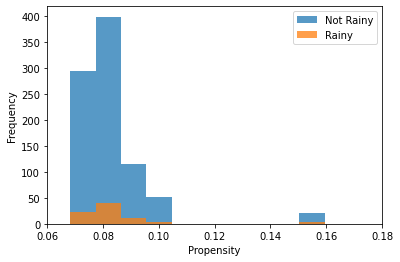

In [ ]:
import matplotlib.pyplot as plt
final_q1df.groupby('rainy')['propensity'].plot(kind='hist',sharex=True,bins=10, alpha=0.75)
plt.xlim((0.06,0.18))
legend(['Not Rainy', 'Rainy'])
xlabel('Propensity')

In [ ]:
q1df[q1df.index.isin(final_q1df.index)]

# Calculate ATE

In [ ]:
res=  pd.DataFrame(columns=['type','model','ATT','ATE'])

## IPW

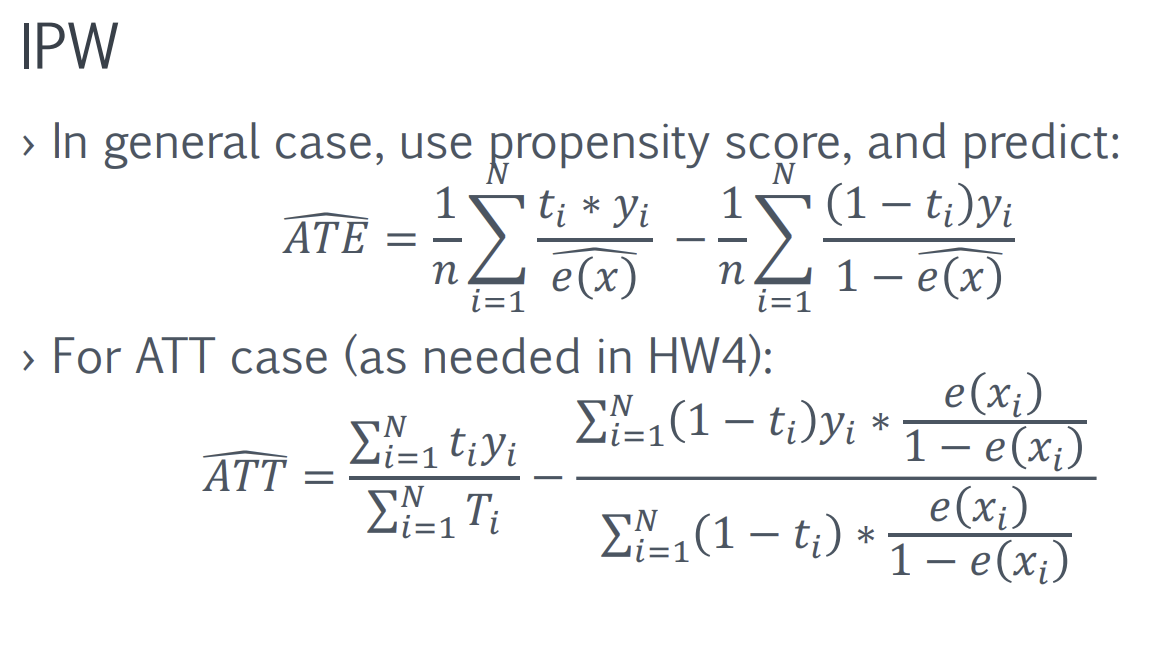

In [ ]:
# calculate ATE and ATT using IPW

def calc_ATE_IPW(data,T='rainy',outcome='cnt'):
  data['ty'] = data[T]*data[outcome]
  data['up'] = (1-data[T])*data[outcome]*data['propensity']*(1/(1-data['propensity']))
  data['down'] = (1-data[T])*data['propensity']*(1/(1-data['propensity']))
  ATE = np.mean(data['ty']/data['propensity']) - np.mean(((1-data[T])*data[outcome])/(1-data['propensity']))
  ATT= (data['ty'].sum()/data[T].sum(0))-(data['up'].sum()/data['down'].sum())
  return ATT,ATE

In [ ]:
ATT_IPW,ATE_IPW = calc_ATE_IPW(final_q2, outcome='casual')
print(f'IPW - Estimated ATE for data: {ATE_IPW}')
print(f'IPW - Estimated ATT for data: {ATT_IPW}')

res = res.append({'type':'IPW','model':'Logistic Regression','ATE':ATE_IPW, 'ATT':ATT_IPW},ignore_index=True)

In [ ]:
res

## S-Learner

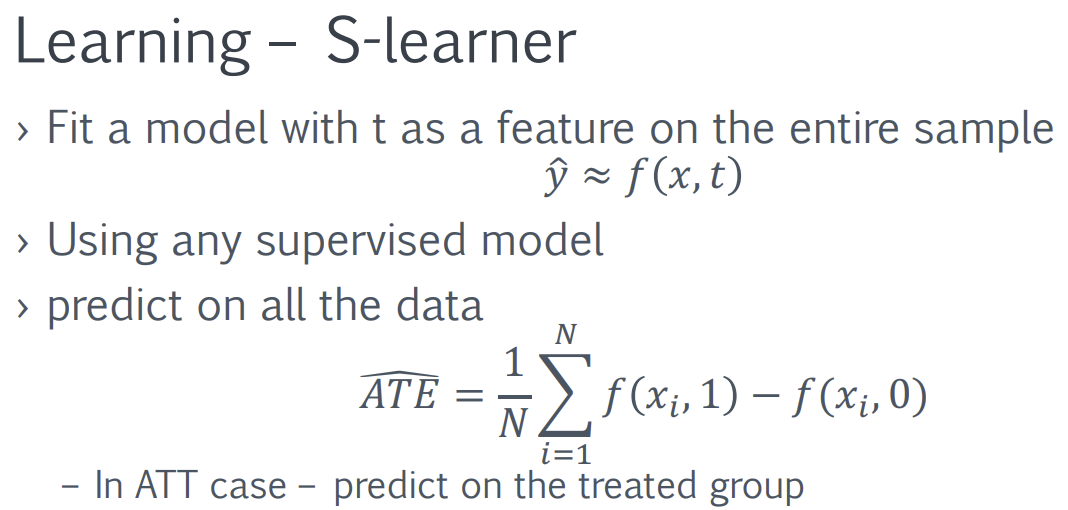

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def s_learner(data,cov,model=LinearRegression, T='rainy',outcome='cnt'):

    X = data[cov]
    for col in cov:
        X = np.c_[X, np.array(data[col])] 
    
    Reg_X = np.c_[X, np.array(data[T])] 
    Y = np.array(data[outcome])
    
    clf = model().fit(Reg_X, Y)

    X_1 = np.c_[X, np.array([1]*X.shape[0])]
    X_1_pred = clf.predict(X_1)
    X_0 = np.c_[X, np.array([0]*X.shape[0])]
    X_0_pred = clf.predict(X_0)
    ATE = np.mean(X_1_pred-X_0_pred)

    data_treated = data[data[T]==1]
    X_treated = data_treated[cov]
    for col in cov:
        X_treated = np.c_[X_treated, np.array(data_treated[col])]
    X_treated_1 = np.c_[X_treated, np.array([1]*X_treated.shape[0])]
    X_treated_1_pred = clf.predict(X_treated_1)
    X_treated_0 = np.c_[X_treated, np.array([0]*X_treated.shape[0])]
    X_treated_0_pred = clf.predict(X_treated_0)
    ATT = np.mean(X_treated_1_pred-X_treated_0_pred)
    return ATE,ATT

In [ ]:
cov = ['mnth','season']
ATE_SL,ATT_SL = s_learner(final_q2,cov, outcome='casual')

print(f'S-learner - Estimated ATE for data: {ATE_SL}')
print(f'S-learner - Estimated ATT for data: {ATT_SL}')

res = res.append({'type':'S Learner','model':'Linear Regression','ATE':ATE_SL, 'ATT':ATT_SL},ignore_index=True)

In [ ]:
cov = ['mnth','season',]
ATE_SL,ATT_SL = s_learner(final_q2,cov,model=XGBRegressor, outcome='casual')

print(f'S-learner - Estimated ATE for data: {ATE_SL}')
print(f'S-learner - Estimated ATT for data: {ATT_SL}')

res = res.append({'type':'S Learner','model':'XGB','ATE':ATE_SL, 'ATT':ATT_SL},ignore_index=True)

In [ ]:
cov = ['mnth','season']
ATE_SL,ATT_SL = s_learner(final_q2,cov,model=XGBRegressor, outcome='casual')

print(f'S-learner - Estimated ATE for data: {ATE_SL}')
print(f'S-learner - Estimated ATT for data: {ATT_SL}')

res = res.append({'type':'S Learner','model':'XGB','ATE':ATE_SL, 'ATT':ATT_SL},ignore_index=True)

In [ ]:

cov = ['mnth','season']
ATE_SL,ATT_SL = s_learner(final_q2,cov,model=RandomForestClassifier, outcome='casual')

print(f'S-learner - Estimated ATE for data: {ATE_SL}')
print(f'S-learner - Estimated ATT for data: {ATT_SL}')

res = res.append({'type':'S Learner','model':'Random Forest','ATE':ATE_SL, 'ATT':ATT_SL},ignore_index=True)

In [ ]:

res

## T-Learner

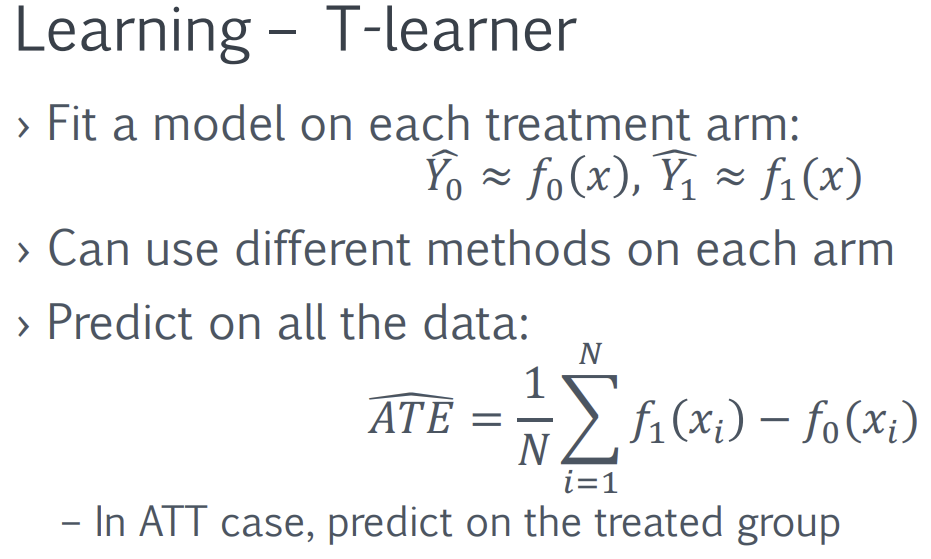

In [ ]:
def aux_adapt_model(data,cov, treated,model,T='rainy',outcome='cnt'):
    data = data[data[T]==treated]
    X = data[cov]
    Y = np.array(data[outcome])
    # scaler = MinMaxScaler()
    # scaler.fit(X)
    # X = scaler.transform(X)
    clf = model().fit(X, Y)
    return clf


def t_learner(data,cov,model=LinearRegression,T='rainy',outcome='cnt'):
    clf_treated = aux_adapt_model(data,cov,model=model, treated=1, outcome=outcome)
    clf_untreated = aux_adapt_model(data,cov,model=model, treated=0,outcome=outcome)
    ATE = np.mean(clf_treated.predict(data[cov]) - clf_untreated.predict(data[cov]))
    data_treated = data[data[T]==1]
    X_treated = data_treated[cov]
    ATT = np.mean(clf_treated.predict(X_treated) - clf_untreated.predict(X_treated))
    return ATE,ATT

In [ ]:
ATE_TL, ATT_TL = t_learner(final_q2,cov, outcome='casual')
print(f't-learner - Estimated ATE for data: {ATE_TL}')
print(f't-learner - Estimated ATT for data: {ATT_TL}')

res = res.append({'type':'T Learner','model':'Linear Regression','ATE':ATE_TL, 'ATT':ATT_TL},ignore_index=True)

In [ ]:
ATE_TL, ATT_TL = t_learner(final_q2,cov, model=XGBRegressor ,outcome='casual')

print(f't-learner - Estimated ATE for data: {ATE_TL}')
print(f't-learner - Estimated ATT for data: {ATT_TL}')

res = res.append({'type':'T Learner','model':'XGB','ATE':ATE_TL, 'ATT':ATT_TL},ignore_index=True)

In [ ]:
ATE_TL, ATT_TL = t_learner(final_q2,cov,model=RandomForestClassifier, outcome='casual')

print(f't-learner - Estimated ATE for data: {ATE_TL}')
print(f't-learner - Estimated ATT for data: {ATT_TL}')

res = res.append({'type':'T Learner','model':'Random Forest','ATE':ATE_TL, 'ATT':ATT_TL},ignore_index=True)

## Matching

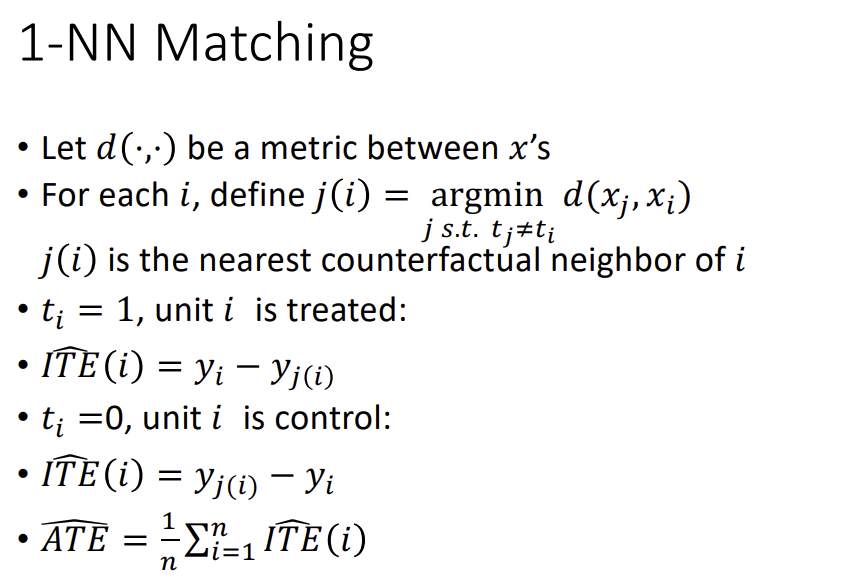

In [ ]:
from numpy import linalg

def matching(data,cov, T='rainy',outcome='cnt',return_neighbours=False):
  treated = data[data[T]==1][cov].to_numpy()
  y1 = data[data[T]==1][outcome].to_numpy()
  untreated = data[data[T]==0][cov].to_numpy()
  y0 = data[data[T]==0][outcome].to_numpy()
  diff_list =[]
  neighbours = pd.DataFrame()
  for i,sample in enumerate(treated):
    diffs = sample-untreated
    # print(sample)
    norms = linalg.norm(diffs, axis=1,ord=1)
    neighbour_idx = np.argmin(norms)
    tmp_res = y1[i]-y0[neighbour_idx]
    diff_list.append(tmp_res)
    n_dict = {}
    for p,c in enumerate(cov):
      n_dict[f'Main_{c}']=sample[p]
      n_dict[f'Neighbour_{c}']=untreated[neighbour_idx][p]
      n_dict[f'Diff_{c}'] = sample[p]-untreated[neighbour_idx][p]
    n_dict['Is_Treated'] = True
    neighbours=neighbours.append(n_dict,ignore_index=True)
  ATT = np.mean(diff_list)
  for i,sample in enumerate(untreated):
    diffs = sample-treated
    norms = linalg.norm(diffs, axis=1,ord=1)
    neighbour_idx = np.argmin(norms)
    diff_list.append(y1[neighbour_idx]-y0[i])
    for p,c in enumerate(cov):
      n_dict[f'Main_{c}']=sample[p]
      n_dict[f'Neighbour_{c}']=untreated[neighbour_idx][p]
      n_dict[f'Diff_{c}'] = sample[p]-untreated[neighbour_idx][p]
    n_dict['Is_Treated'] = False
    neighbours=neighbours.append(n_dict,ignore_index=True)
  ATE = np.mean(diff_list)
  if return_neighbours:
    return ATE,ATT, neighbours
  else:
    return ATE,ATT

In [ ]:
final_q1df.columns

In [ ]:
cov=['mnth','season','temp', 'atemp', 'hum', 'windspeed']
ATE_matching, ATT_matching,  neighbours= matching(final_q1df,cov,outcome='casual',return_neighbours=True)
print(f't-learner - Estimated ATE for data: {ATE_matching}')
print(f't-learner - Estimated ATT for data: {ATT_matching}')

# res = res.append({'type':'Matching','ATE':ATE_matching, 'ATT':ATT_matching},ignore_index=True)
# neighbours['mnth_matching'=='']

In [ ]:
neighbours.describe()

In [ ]:
neighbours_b = []
cov=['mnth','season']
for b in range(2):
  sample = final_q1df.sample(len(final_q1df),replace=True)
  ATE_matching, ATT_matching,neighbour_matching = matching(sample,cov,outcome='registered',return_neighbours=True)
  neighbours_b.append(neighbour_matching)

In [ ]:
neighbours_0 = neighbours_b[0]
neighbours_1 = neighbours_b[1]

In [ ]:
neighbours_0[neighbours_0.Is_Treated==True].describe()

In [ ]:
neighbours_0[neighbours_0.Is_Treated==False].describe()

In [ ]:
neighbours_1[neighbours_1.Is_Treated==True].describe()

In [ ]:
neighbours_1[neighbours_1.Is_Treated==False].describe()

##BOOTSTRAP

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from functools import partial



def bootstrap_CI (data,cov,B=500, alpha=0.05, T='rainy',outcome='casual'):
  ATEs=  pd.DataFrame(columns=['IPW','S learner','T learner', 'Matching'])
  ATTs=pd.DataFrame(columns=['IPW','S learner','T learner', 'Matching'])
  funcs = [calc_ATE_IPW,]
  for b in tqdm(range(B)):
    sample = data.sample(len(data),replace=True)
    ATT_IPW,ATE_IPW = calc_ATE_IPW(sample, outcome=outcome)
    # ATE_SL_LR,ATT_SL_LR = s_learner(sample,cov, outcome=outcome)
    ATE_SL_XGB,ATT_SL_XGB = s_learner(sample,cov,model=partial(XGBRegressor,silent=True), outcome=outcome)
    # ATE_SL_RF,ATT_SL_RF = s_learner(sample,cov, model =RandomForestClassifier, outcome=outcome)
    # ATE_TL_LR, ATT_TL_LR = t_learner(sample,cov, outcome=outcome)
    ATE_TL_XGB, ATT_TL_XGB = t_learner(sample,cov,model=partial(XGBRegressor,silent=True), outcome=outcome)
    # ATE_TL_RF, ATT_TL_RF = t_learner(sample,cov,model =RandomForestClassifier, outcome=outcome)
  
    ATE_matching, ATT_matching = matching(sample,cov,outcome=outcome)

    # ATEs = ATEs.append({'IPW':ATE_IPW,'S learner LR':ATE_SL_LR,'S learner XGB':ATE_SL_XGB,'S learner RF':ATE_SL_RF,
    #                     'T learner LR':ATE_TL_LR,'T learner XGB':ATE_TL_XGB,'T learner RF':ATE_TL_RF,
    #                     'Matching':ATE_matching},ignore_index=True)
    # ATTs = ATTs.append({'IPW':ATT_IPW,'S learner LR':ATT_SL_LR,'S learner XGB':ATT_SL_XGB,'S learner RF':ATT_SL_RF,
    #                     'T learner LR':ATT_TL_LR,'T learner XGB':ATT_TL_XGB,'T learner RF':ATT_TL_RF,
    #                     'Matching':ATT_matching},ignore_index=True)
    ATEs = ATEs.append({'IPW':ATE_IPW,'S learner XGB':ATE_SL_XGB,
                        'T learner XGB':ATE_TL_XGB, 'Matching':ATE_matching},ignore_index=True)
    ATTs = ATTs.append({'IPW':ATT_IPW,'S learner XGB':ATT_SL_XGB,
                        'T learner XGB':ATT_TL_XGB, 'Matching':ATT_matching},ignore_index=True)

  def CALC_CI(estimataions, type):
    if type=='percentiles':
      percentiles = sorted(estimataions)
      upper_percentile = np.percentile(percentiles, 100 - (alpha * 100) / 2)  # 0.975
      lower_percentile = np.percentile(percentiles, (alpha * 100) / 2)  # 0.025
      # median = np.percentile(percentiles,50)  # 0.5
      mean = np.mean(estimataions)  
      return (lower_percentile, mean, upper_percentile)
    else:
      mean = np.mean(estimataions)
      std = np.std(estimataions)
      pct = scipy.stats.norm.ppf(1-(alpha/2))
      return (mean-pct*std,mean, mean+pct*std)

  CI_dict = {}
  for type_AT in ['ATE','ATT']:
    df = ATEs if type_AT=='ATE' else ATTs
    for type_CI in ['percentiles','normal']:
      tmp_df = pd.DataFrame({'type':[],'lower':[],'upper':[]})
      # for est in ['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']:
      for est in ['IPW','S learner XGB','T learner XGB','Matching']:
        CI_l,middle,CI_u = CALC_CI(df[est].values,type_CI)
        tmp_df=tmp_df.append({'type':est,'lower':CI_l,'middle':middle,'upper':CI_u}, ignore_index=True)
      CI_dict[f'{type_AT}_{type_CI}']=tmp_df

  return CI_dict

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
cov = ['mnth','season']

CI_dict_casual = bootstrap_CI(final_q1df, cov, B=1000, outcome='casual')
CI_dict_registered = bootstrap_CI(final_q1df, cov, B=1000, outcome='registered')

In [ ]:
CI_dict['ATE_percentiles']

In [ ]:
CI_dict

In [ ]:
fig, axs = plt.subplots(2,2, edgecolor='k', figsize=(10,6.5), sharey=True,sharex=True)
# plt.ylim((0,10))
plt.xlim((-1001,50))
axs = axs.ravel()  
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['IPW','S learner','T learner','Matching']
order = ['ATE_percentiles', 'ATT_percentiles','ATE_normal', 'ATT_normal']
# colors = ['r','g','g','g','b','b','b','orange']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks(range(len(ticks)+1),[' ']+ticks)
plt.grid(alpha=0.25)
for i,k in enumerate(order):
  CIs = CI_dict_casual[k]
  axs[i].set_title(" ".join(k.split('_')))
  for j,t in enumerate(ticks):
    t= t + ' XGB' if 'learner' in t else t
    tmp = CIs[CIs['type']==t]
    axs[i].plot((tmp['lower'].item(),tmp['upper'].item()),(j+1,j+1),'o-',color=colors[j], markersize=3.3)
    axs[i].scatter(tmp['middle'].item(),j+1,marker='*',c=colors[j])
    axs[i].grid(alpha=0.3)
    axs[i].axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

In [ ]:
fig, axs = plt.subplots(2,2, edgecolor='k', figsize=(10,6.5), sharey=True,sharex=True)
# plt.ylim((0,10))
plt.xlim((-1001,50))
axs = axs.ravel()  
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['IPW','S learner','T learner','Matching']
order = ['ATE_percentiles', 'ATT_percentiles','ATE_normal', 'ATT_normal']
# colors = ['r','g','g','g','b','b','b','orange']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks(range(len(ticks)+1),[' ']+ticks)
plt.grid(alpha=0.25)
for i,k in enumerate(order):
  CIs = CI_dict[k]
  axs[i].set_title(" ".join(k.split('_')))
  for j,t in enumerate(ticks):
    t= t + ' XGB' if 'learner' in t else t
    tmp = CIs[CIs['type']==t]
    axs[i].plot((tmp['lower'].item(),tmp['upper'].item()),(j+1,j+1),'o-',color=colors[j], markersize=3.3)
    axs[i].scatter(tmp['middle'].item(),j+1,marker='*',c=colors[j])
    axs[i].grid(alpha=0.3)
    axs[i].axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

#Q1 casual - ATE

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (4.7,3.5)
# plt.ylim((0,10))
# plt.xlim((-750,50))
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['Matching','T learner','S learner','IPW']
order = ['ATE_normal','ATE_percentiles']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks([1.5,3.5,5.5,7.5],ticks)
plt.grid(alpha=0.25)
y=1
for j,t in enumerate(ticks):
  t= t + ' XGB' if 'learner' in t else t
  for i,k in enumerate(order):
    CIs = CI_dict_casual[k]
    tmp = CIs[CIs['type']==t]
    ls = 'o-' if i==0 else 'o-.'
    plt.plot((tmp['lower'].item(),tmp['upper'].item()),(y,y),ls,color=colors[j], markersize=3.3)
    plt.scatter(tmp['middle'].item(),y,marker='*',c=colors[j])
    plt.grid(alpha=0.3)
    plt.axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
    y+=1
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

normal = mlines.Line2D([],[],linestyle='-',marker='o', color='k',label='Normal')
pct = mlines.Line2D([],[], color='k',linestyle=':',marker='o',label='Percentile')

# plt.legend(handles=[normal,pct],bbox_to_anchor=(50,50))
plt.legend(handles=[pct,normal],fontsize =9,loc='lower right')

# plt.show()

#Q! Casual - ATT

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (4.7,3.5)
# plt.ylim((0,10))
# plt.xlim((-950,50))
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['Matching','T learner','S learner','IPW']
order = ['ATT_normal','ATT_percentiles']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks([1.5,3.5,5.5,7.5],ticks)
plt.grid(alpha=0.25)
y=1
for j,t in enumerate(ticks):
  t= t + ' XGB' if 'learner' in t else t
  for i,k in enumerate(order):
    CIs = CI_dict_casual[k]
    tmp = CIs[CIs['type']==t]
    ls = 'o-' if i==0 else 'o-.'
    plt.plot((tmp['lower'].item(),tmp['upper'].item()),(y,y),ls,color=colors[j], markersize=3.3)
    plt.scatter(tmp['middle'].item(),y,marker='*',c=colors[j])
    plt.grid(alpha=0.3)
    plt.axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
    y+=1
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

normal = mlines.Line2D([],[],linestyle='-',marker='o', color='k',label='Normal')
pct = mlines.Line2D([],[], color='k',linestyle=':',marker='o',label='Percentile')

# plt.legend(handles=[normal,pct],bbox_to_anchor=(50,50))
plt.legend(handles=[pct,normal],fontsize =9,loc='upper left')

# plt.show()

#Q1 Registered - ATE

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (4.7,3.5)
# plt.ylim((0,10))
# plt.xlim((-750,50))
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['Matching','T learner','S learner','IPW']
order = ['ATE_normal','ATE_percentiles']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks([1.5,3.5,5.5,7.5],ticks)
plt.grid(alpha=0.25)
y=1
for j,t in enumerate(ticks):
  t= t + ' XGB' if 'learner' in t else t
  for i,k in enumerate(order):
    CIs = CI_dict_registered[k]
    tmp = CIs[CIs['type']==t]
    ls = 'o-' if i==0 else 'o-.'
    plt.plot((tmp['lower'].item(),tmp['upper'].item()),(y,y),ls,color=colors[j], markersize=3.3)
    plt.scatter(tmp['middle'].item(),y,marker='*',c=colors[j])
    plt.grid(alpha=0.3)
    plt.axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
    y+=1
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

normal = mlines.Line2D([],[],linestyle='-',marker='o', color='k',label='Normal')
pct = mlines.Line2D([],[], color='k',linestyle=':',marker='o',label='Percentile')

# plt.legend(handles=[normal,pct],bbox_to_anchor=(50,50))
plt.legend(handles=[pct,normal],fontsize =9,loc='lower right')

# plt.show()

#Q1 Registered - ATT

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (4.7,3.6)
# plt.ylim((0,10))
# plt.xlim((-750,50))
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['Matching','T learner','S learner','IPW']
order = ['ATT_normal','ATT_percentiles']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks([1.5,3.5,5.5,7.5],ticks,fontsize=8)
plt.xticks(fontsize=8)

plt.grid(alpha=0.25)
y=1
for j,t in enumerate(ticks):
  t= t + ' XGB' if 'learner' in t else t
  for i,k in enumerate(order):
    CIs = CI_dict_registered[k]
    tmp = CIs[CIs['type']==t]
    ls = 'o-' if i==0 else 'o-.'
    plt.plot((tmp['lower'].item(),tmp['upper'].item()),(y,y),ls,color=colors[j], markersize=3.3)
    plt.scatter(tmp['middle'].item(),y,marker='*',c=colors[j])
    plt.grid(alpha=0.3)
    plt.axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
    y+=1
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

normal = mlines.Line2D([],[],linestyle='-',marker='o', color='k',label='Normal')
pct = mlines.Line2D([],[], color='k',linestyle=':',marker='o',label='Percentile')

# plt.legend(handles=[normal,pct],bbox_to_anchor=(50,50))
plt.legend(handles=[pct,normal],fontsize =9,loc='lower right')

IPW = mlines.Line2D([],[],linestyle='-', color='k',label='Normal')
S = mlines.Line2D([],[],linestyle='-', color='k',label='Normal')
T = mlines.Line2D([],[],linestyle='-', color='k',label='Normal')
Matching = mlines.Line2D([],[],linestyle='-', color='k',label='Normal')

# plt.show()

In [ ]:
CI_dict_registered

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# plt.ylim((0,10))
# plt.xlim((-900,50))
# ticks =['IPW','S learner LR','S learner XGB','S learner RF','T learner LR','T learner XGB','T learner RF','Matching']
ticks = ['Matching','T learner','S learner','IPW']
order = ['ATT_normal','ATT_percentiles']
colors = ['#512DA8','g','#1E88E5','orange']
plt.yticks([1.5,3.5,5.5,7.5],ticks)
plt.grid(alpha=0.25)
y=1
for j,t in enumerate(ticks):
  t= t + ' XGB' if 'learner' in t else t
  for i,k in enumerate(order):
    CIs = CI_dict[k]
    tmp = CIs[CIs['type']==t]
    ls = 'o-' if i==0 else 'o-.'
    plt.plot((tmp['lower'].item(),tmp['upper'].item()),(y,y),ls,color=colors[j], markersize=3.3)
    plt.scatter(tmp['middle'].item(),y,marker='*',c=colors[j])
    plt.grid(alpha=0.3)
    plt.axvline(0, linestyle='--', alpha=0.55, linewidth=0.6, color='r')
    y+=1
# plt.yticks(range(len(ticks)+1),[' ']+ticks)

normal = mlines.Line2D([],[],linestyle='-',marker='o', color='k',label='Normal CI')
pct = mlines.Line2D([],[], color='k',linestyle=':',marker='o',label='Percentile CI')

# plt.legend(handles=[normal,pct],bbox_to_anchor=(50,50))
plt.legend(handles=[pct,normal],fontsize =8.5,loc='upper right')

# plt.show()

In [ ]:
CI_dict

In [ ]:
check = CI_dict['ATE_normal']
ticks =['IPW','S learner','T learner','Matching']
for j,t in enumerate(ticks):
  print(t)
  tmp = check[check['type']==t]
  # print(tmp['lower'].item(),tmp['upper'])

In [ ]:
final_q2[final_q2['rainy']==1].shape